## Objective

The objective of this project is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

## Plans to Execute

1. Load dataset
2. Check the dataset information and distribution
3. Check missing values
4. visualize the feature distributions and relationship between the features
5. Outliers analysis
6. Training and testing on raw dataset
7. Principal Component Analysis
8. Training and testing on transformed features(Principal Components)
9. Feature selection using Extra Tree Classfier and Random Forest (Not Implemented in this project)
10. K-Means clustering on full data set
11. Ensemble classification and cluster results and retrain the results using Logistic Regression(Not Implemented in this project)
12. Summary

## Exploratory Data Analysis

In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Dataset

In [476]:
dataset = pd.read_csv("vehicle.csv")
dataset.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### There are 19 columns(including target class) in the dataset

#### There are 3 classes in the output

In [477]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### All the independent features are of numeric type

In [479]:
dataset.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### There are a few missing values in almost ~15 columns. We need to find the row having one or more missing value columns and try to fill to it by using mean or median. The manipulated records should be kept in training data.

In [478]:
dataset.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

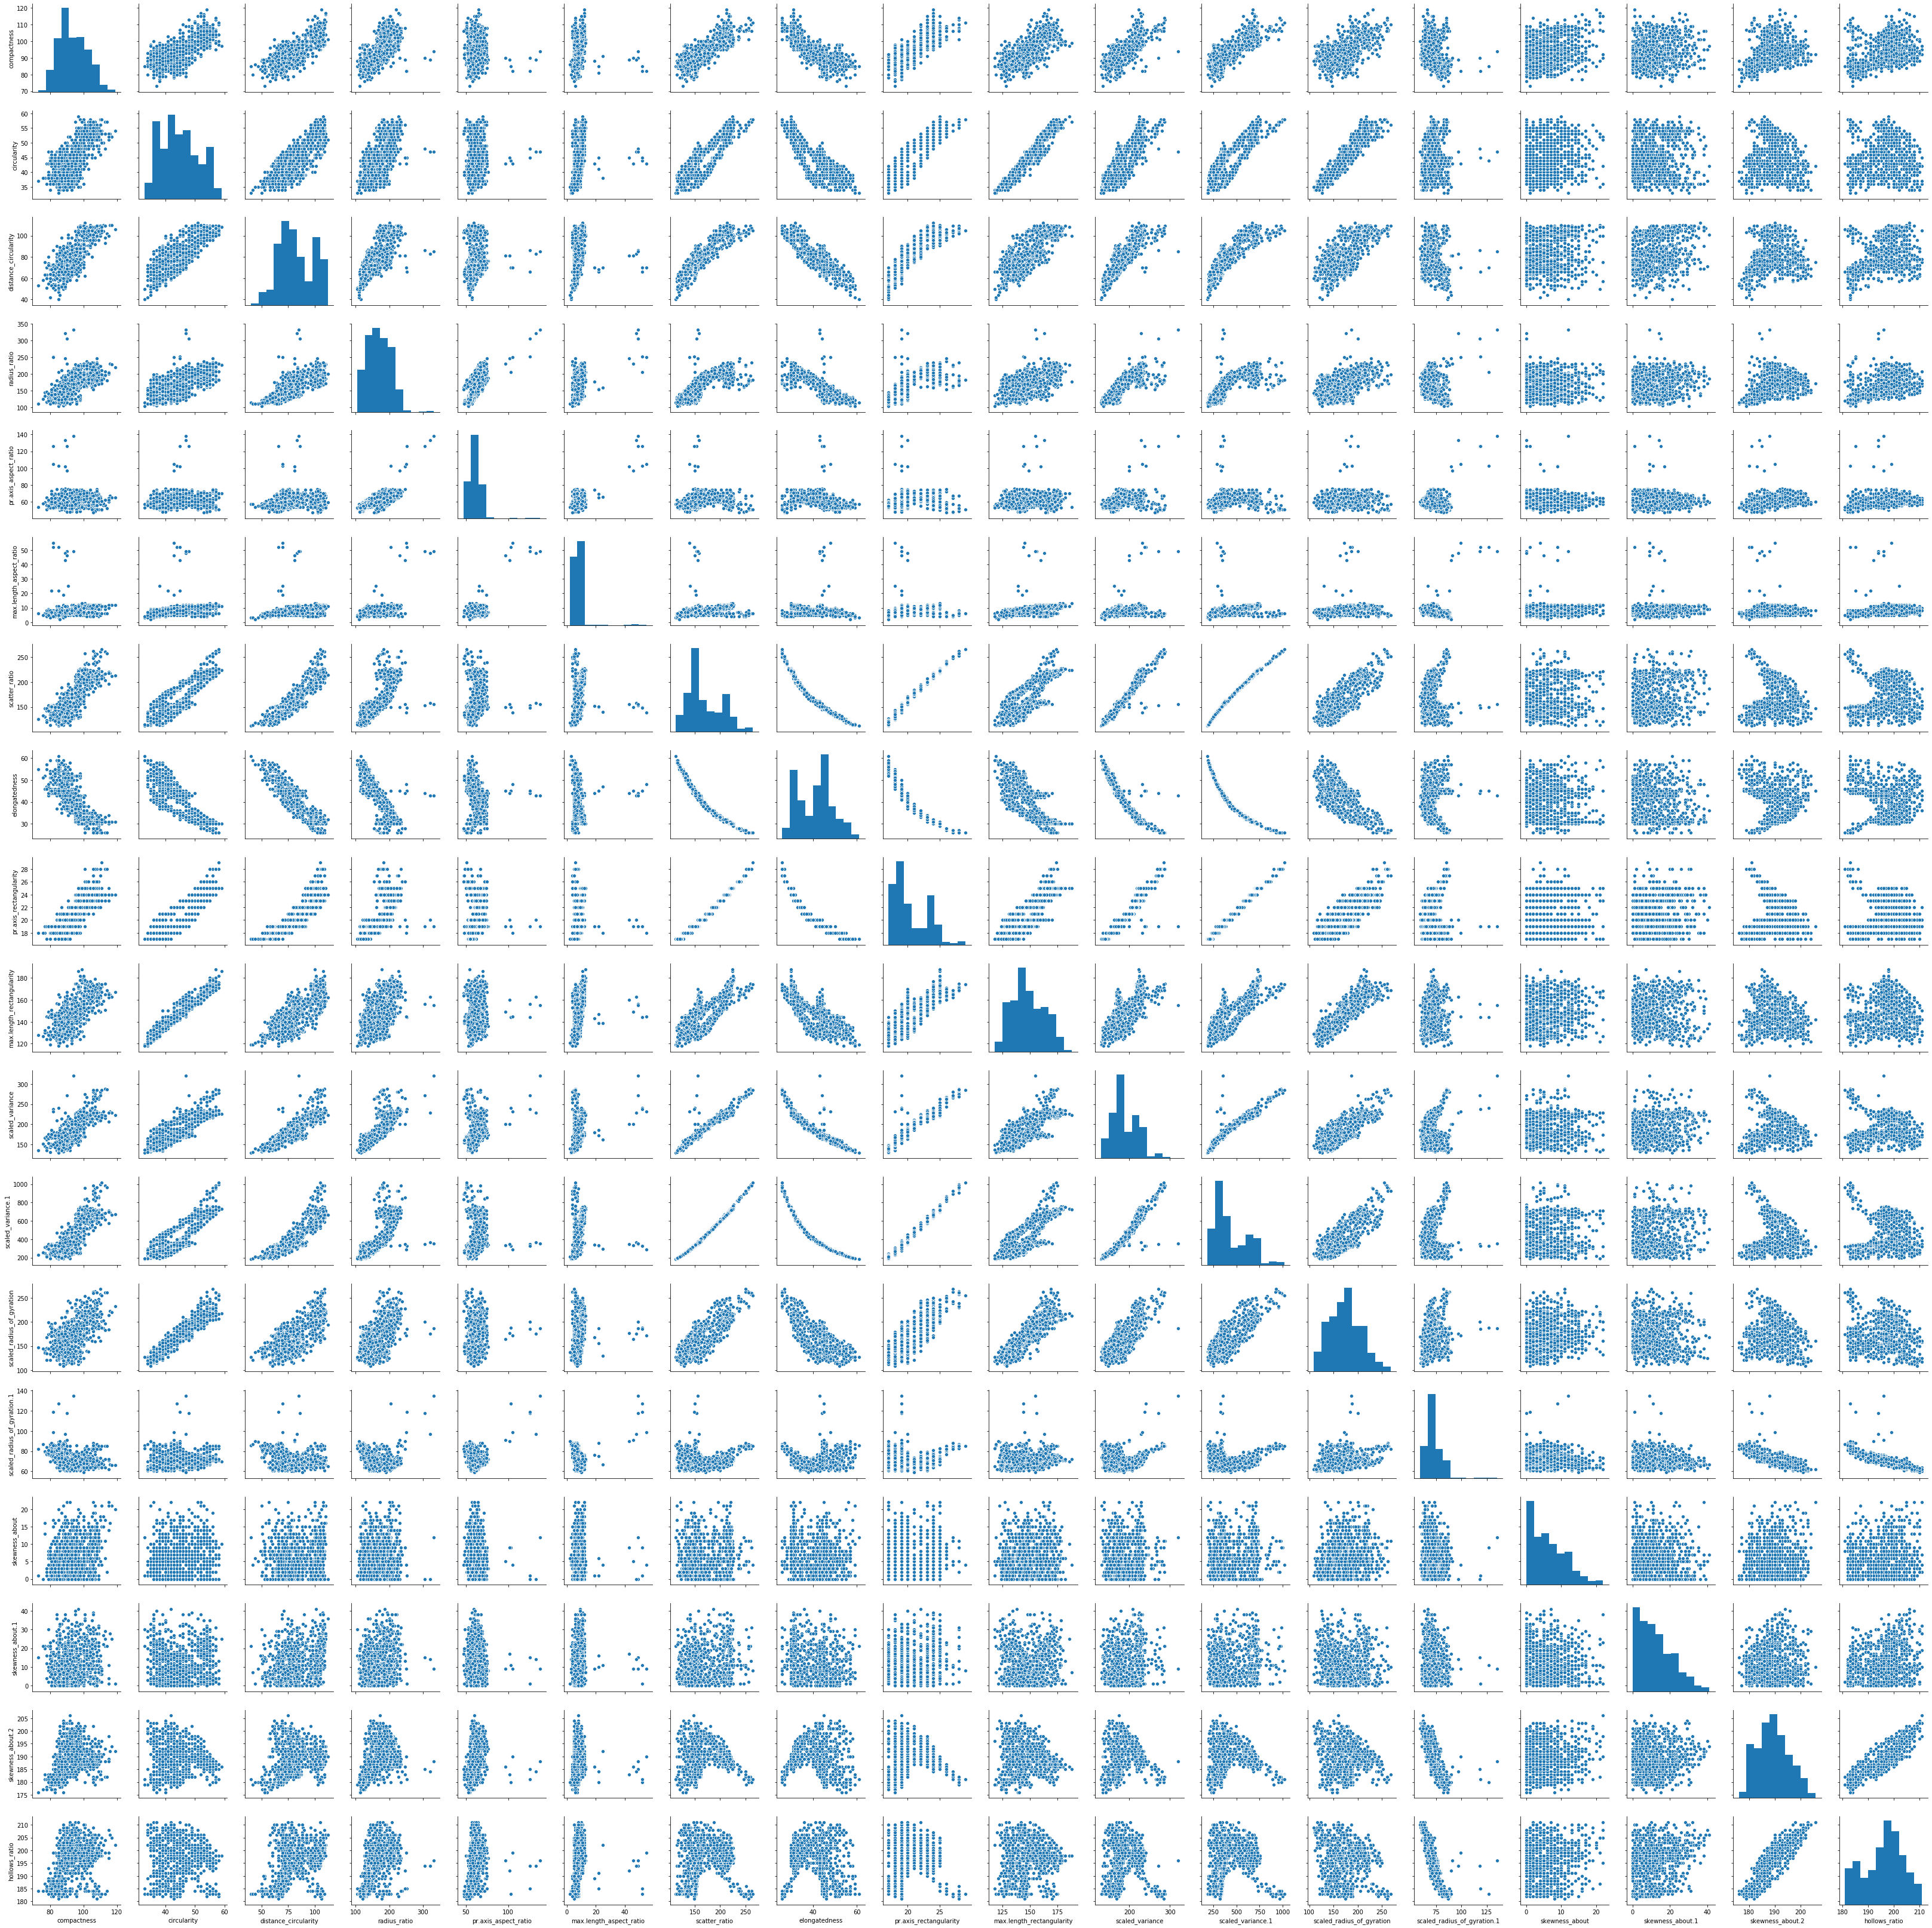

In [482]:
sns.pairplot(dataset)

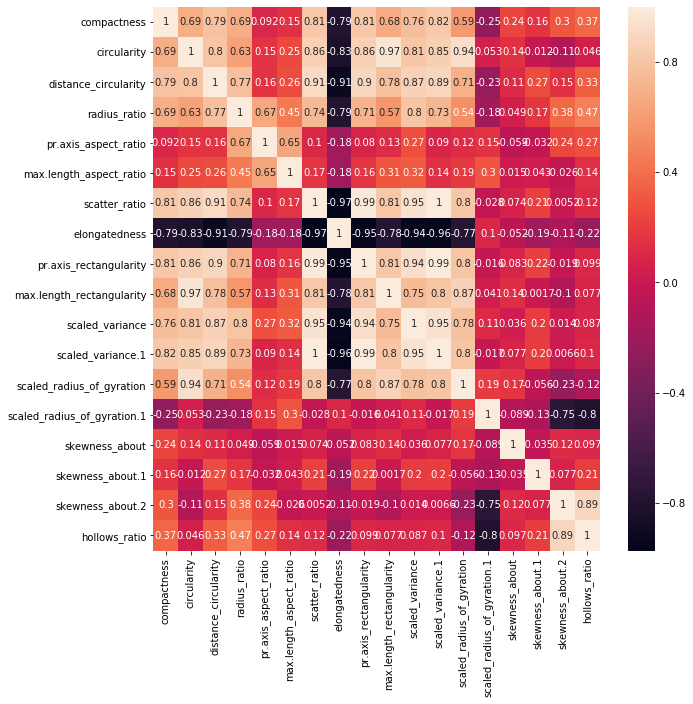

In [486]:
plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

#### Most of the independent variables has linear relationship among themselves. This will impact the performance of linear models like SVM, Logistic Regression etc. So we need to do PCA to get rid of linear relation among the independent features. Based on how much variance is captured by the principal components, we can reduce the dimension feature space.

### Detailed Analysis of features 

#### Circularity and Compactness

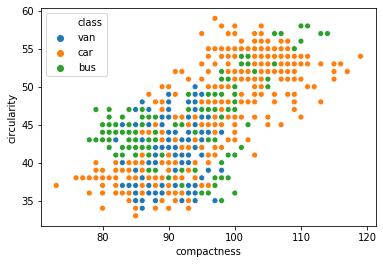

In [488]:
sns.scatterplot(dataset["compactness"], dataset["circularity"],hue=dataset["class"])

From the above figure, I doubt the following things
1. Outlier in circularity and copactness for class "bus" because the green dots are widely scattered
2. Linear relationship between circularity and compactness doesn't exist for class "van"
3. If we manage outliers for class "bus", the linear relationship will be reduced for class "bus" as well


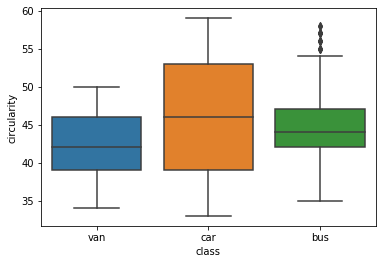

In [492]:
sns.boxplot(y = dataset["circularity"], x=dataset["class"])

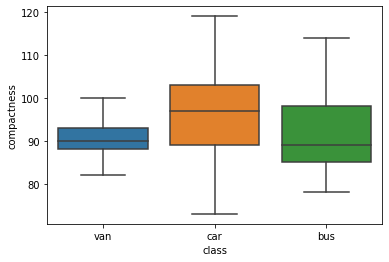

In [490]:
sns.boxplot(y = dataset["compactness"], x=dataset["class"])

Outliers exist in circularity values for class "bus"

It's difficult to differentiate van and bus by checking the "circularity", but car has high circularity value. Since there are outliers in Circulariy for "bus" class, there are chances to misclassify "bus" as "car". So we need to handle outliers prior to training.

#### Circularity and Distance Cirucularity

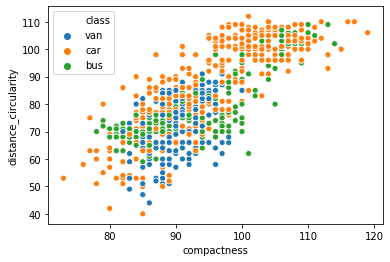

In [493]:
sns.scatterplot(dataset["compactness"], dataset["distance_circularity"],hue=dataset["class"])

Same observation as that of Compactness and Circularity

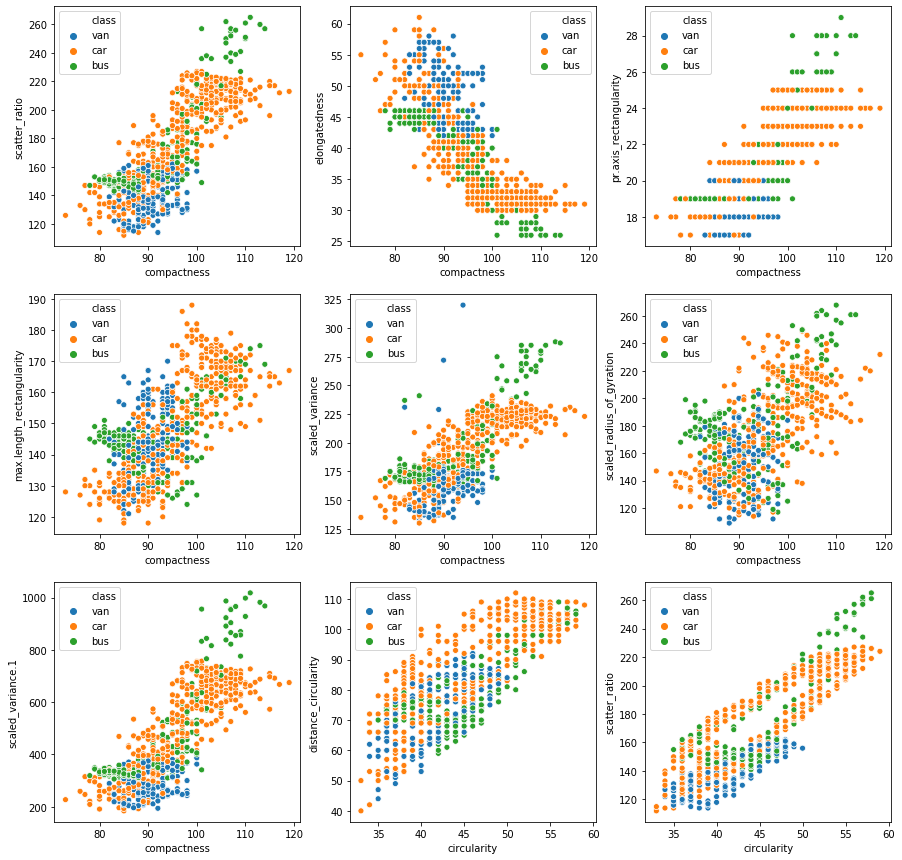

In [509]:
f,axes =plt.subplots(nrows=3,ncols=3, figsize=(15,15))
sns.scatterplot(dataset["compactness"], dataset["scatter_ratio"],hue=dataset["class"],ax=axes[0, 0])
sns.scatterplot(dataset["compactness"], dataset["elongatedness"],hue=dataset["class"],ax=axes[0, 1])
sns.scatterplot(dataset["compactness"], dataset["pr.axis_rectangularity"],hue=dataset["class"],ax=axes[0, 2])
sns.scatterplot(dataset["compactness"], dataset["max.length_rectangularity"],hue=dataset["class"],ax=axes[1, 0])
sns.scatterplot(dataset["compactness"], dataset["scaled_variance"],hue=dataset["class"],ax=axes[1, 1])
sns.scatterplot(dataset["compactness"], dataset["scaled_radius_of_gyration"],hue=dataset["class"],ax=axes[1, 2])
sns.scatterplot(dataset["compactness"], dataset["scaled_variance.1"],hue=dataset["class"],ax=axes[2, 0])
sns.scatterplot(dataset["circularity"], dataset["distance_circularity"],hue=dataset["class"],ax=axes[2,1])
sns.scatterplot(dataset["circularity"], dataset["scatter_ratio"],hue=dataset["class"],ax=axes[2,2])


Higher values of scatter_ratio for cars

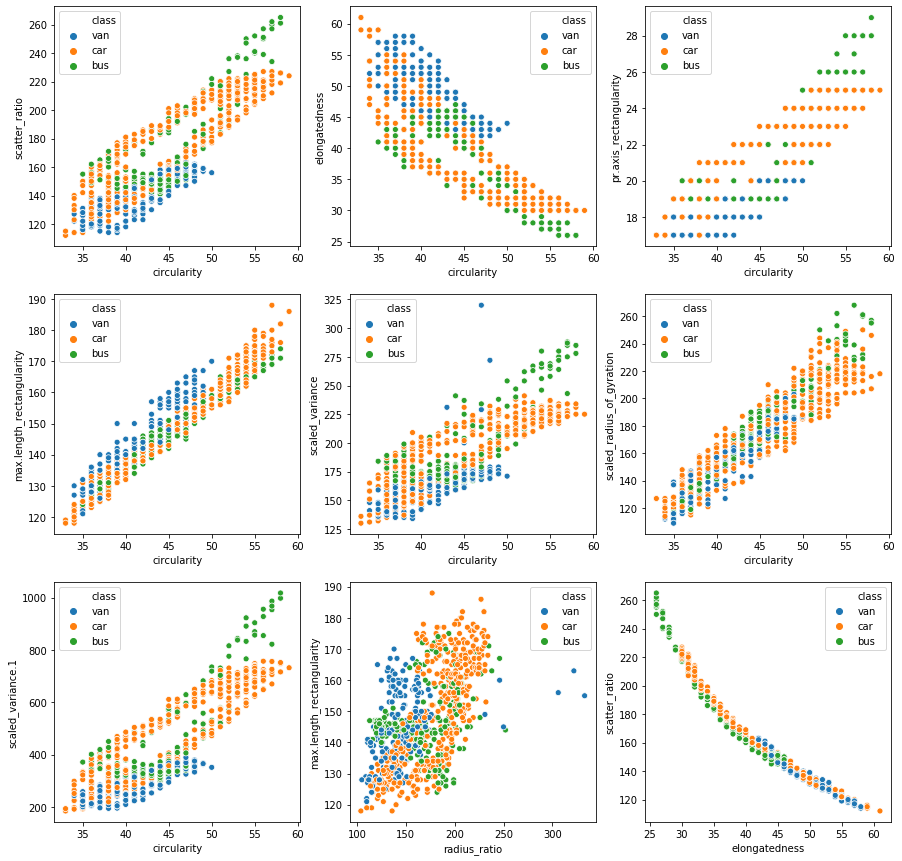

In [517]:
f,axes =plt.subplots(nrows=3,ncols=3, figsize=(15,15))
sns.scatterplot(dataset["circularity"], dataset["scatter_ratio"],hue=dataset["class"],ax=axes[0, 0])
sns.scatterplot(dataset["circularity"], dataset["elongatedness"],hue=dataset["class"],ax=axes[0, 1])
sns.scatterplot(dataset["circularity"], dataset["pr.axis_rectangularity"],hue=dataset["class"],ax=axes[0, 2])
sns.scatterplot(dataset["circularity"], dataset["max.length_rectangularity"],hue=dataset["class"],ax=axes[1, 0])
sns.scatterplot(dataset["circularity"], dataset["scaled_variance"],hue=dataset["class"],ax=axes[1, 1])
sns.scatterplot(dataset["circularity"], dataset["scaled_radius_of_gyration"],hue=dataset["class"],ax=axes[1, 2])
sns.scatterplot(dataset["circularity"], dataset["scaled_variance.1"],hue=dataset["class"],ax=axes[2, 0])
sns.scatterplot(dataset["radius_ratio"], dataset["max.length_rectangularity"],hue=dataset["class"],ax=axes[2,1])
sns.scatterplot(dataset["elongatedness"], dataset["scatter_ratio"],hue=dataset["class"],ax=axes[2,2])

### Analysis of Outliers

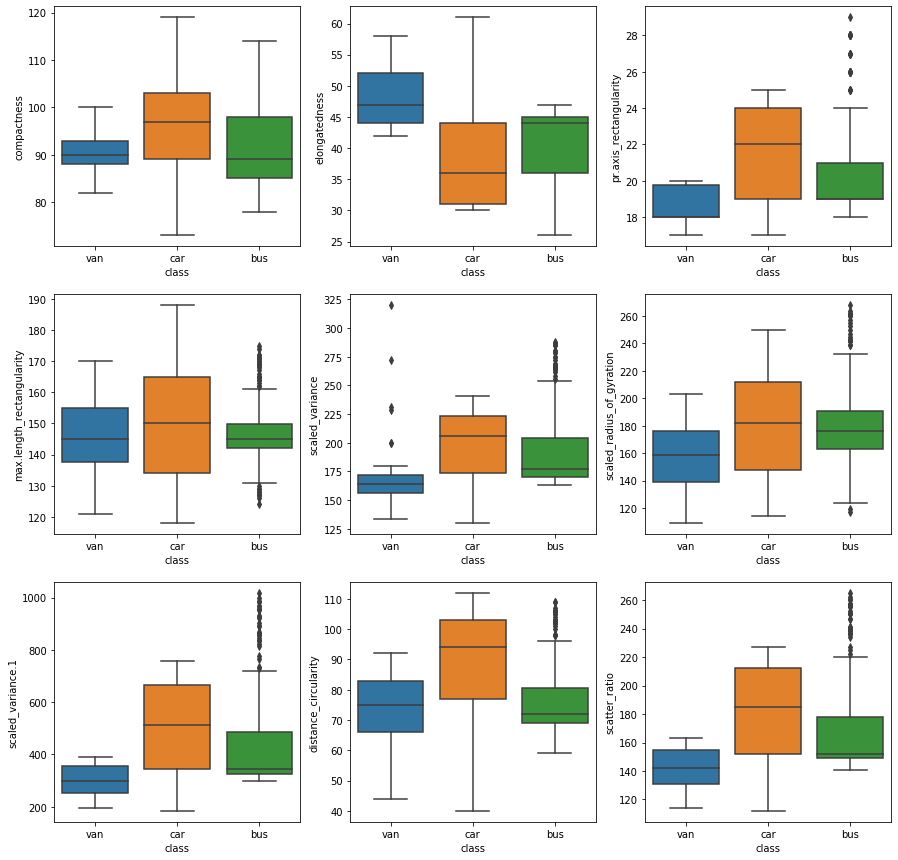

In [515]:
f,axes =plt.subplots(nrows=3,ncols=3, figsize=(15,15))
sns.boxplot(y=dataset["compactness"], x=dataset["class"],ax=axes[0, 0])
sns.boxplot(y=dataset["elongatedness"],x=dataset["class"],ax=axes[0, 1])
sns.boxplot(y=dataset["pr.axis_rectangularity"],x=dataset["class"],ax=axes[0, 2])
sns.boxplot(y=dataset["max.length_rectangularity"],x=dataset["class"],ax=axes[1, 0])
sns.boxplot(y=dataset["scaled_variance"],x=dataset["class"],ax=axes[1, 1])
sns.boxplot(y=dataset["scaled_radius_of_gyration"],x=dataset["class"],ax=axes[1, 2])
sns.boxplot(y=dataset["scaled_variance.1"],x=dataset["class"],ax=axes[2, 0])
sns.boxplot(y=dataset["distance_circularity"],x=dataset["class"],ax=axes[2,1])
sns.boxplot(y=dataset["scatter_ratio"],x=dataset["class"],ax=axes[2,2])

Most of the features for "bus" contain extreme values. So scaling of the dataset will help to handle the outlier to some extend

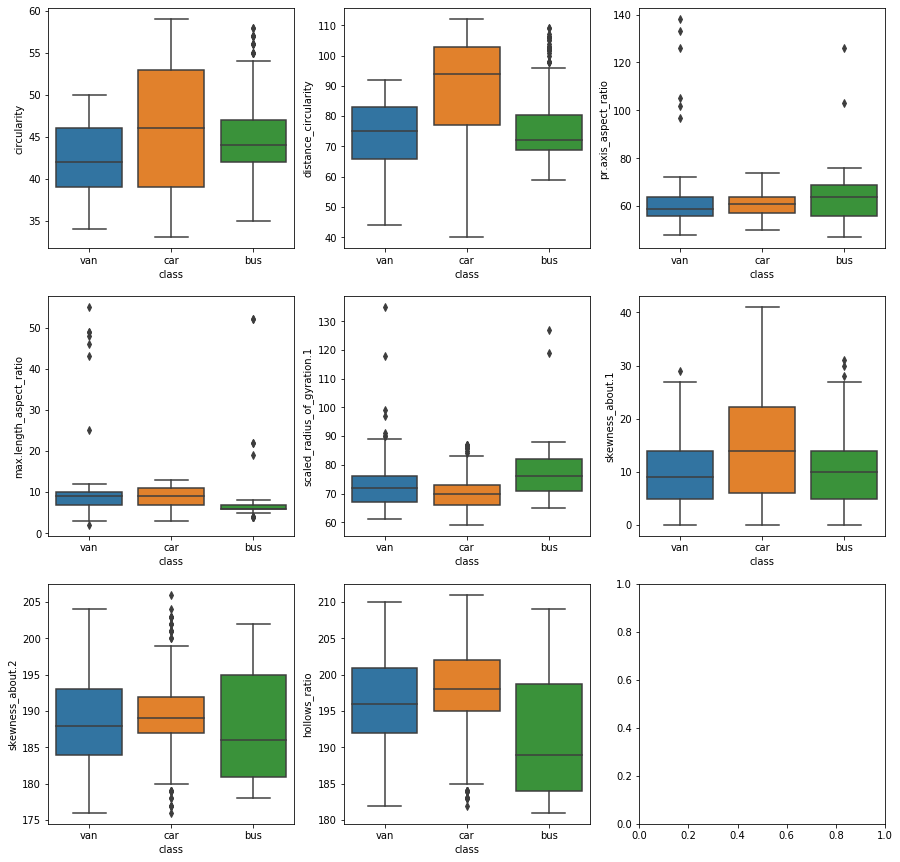

In [516]:
f,axes =plt.subplots(nrows=3,ncols=3, figsize=(15,15))
sns.boxplot(y=dataset["circularity"], x=dataset["class"],ax=axes[0, 0])
sns.boxplot(y=dataset["distance_circularity"],x=dataset["class"],ax=axes[0, 1])
sns.boxplot(y=dataset["pr.axis_aspect_ratio"],x=dataset["class"],ax=axes[0, 2])
sns.boxplot(y=dataset["max.length_aspect_ratio"],x=dataset["class"],ax=axes[1, 0])
sns.boxplot(y=dataset["scaled_radius_of_gyration.1"],x=dataset["class"],ax=axes[1, 1])
sns.boxplot(y=dataset["skewness_about.1"],x=dataset["class"],ax=axes[1, 2])
sns.boxplot(y=dataset["skewness_about.2"],x=dataset["class"],ax=axes[2, 0])
sns.boxplot(y=dataset["hollows_ratio"],x=dataset["class"],ax=axes[2,1])

Hollows ratio for "bus" is having lower values compared to"van" and "car"

max_length_aspect ratio is an important feature for identifying bus from other two classes.

distance_circularity is higher for car.

lower value of scaled_varience points to the class -"van"

Elongateness is higher for "van"

# Training and Performance Evaluation

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module for splitting the entire dataset into training and testing dataset
from sklearn.model_selection import train_test_split

#import LogisticReGression Model
from sklearn.linear_model import LogisticRegression

#import NaiveBayes model
from sklearn.naive_bayes import GaussianNB

#import KNN model
from sklearn.neighbors import KNeighborsClassifier

#import SVM model
from sklearn.svm import SVC

#Import metrics modulel to calculate model performance
from sklearn import metrics

#import resample module for upsampling
from sklearn.utils import resample

# module for evaluating the feature dependecies with target variable
import statsmodels.formula.api as sm

# module for cross validation
from sklearn.model_selection import cross_val_score 

# module for AUC-ROC Calculation
from sklearn.metrics import roc_curve, auc

# module for SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# module for ensembled models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier,GradientBoostingClassifier,ExtraTreesClassifier

# module for decision tree
from sklearn.tree import DecisionTreeClassifier

# 
from xgboost import XGBClassifier

from catboost import CatBoostClassifier

import lightgbm as lgb

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

class tuning_params:
    def __init__(self):
        self.random_forest = None
        self.adaboost = None
        self.svm = None
        
class feature_selection:
    def __init__(self, features):
        self.feature_importance_metrics = pd.DataFrame()
        self.feature_importance_metrics["features"] = features
        self.feature_importance_metrics["NetImportance"] = np.zeros(features.length)
        
    def add_to_metrics(feature_importance,model_name):
        self.feature_importance_metrics = pd.merge(self.feature_importance_metrics,feature_importance,on=["features"])
        self.feature_importance_metrics["NetImportance"] = self.feature_importance_metrics.apply(lambda x: (x["NetImportance"] + x[model_name])/2)
        
    def get_features(threshold):
        return self.feature_importance_metrics[(self.feature_importance_metrics["NetImportance"]>threshold)]["features"]
    


hyperparams = tuning_params()

def drop_columns(df, col_names,inplace=False):
    print("--------Dropping columns-----")
    return df.drop(col_names,inplace = inplace, axis=1)


def transform_data(df):
    
    # Create a new column CCUsage from CCAvg column
    df["CCUsage"] = df.apply(lambda x: 1 if x.CCAvg < 3 else 2 if (x.CCAvg >= 3 and x.CCAvg <6) else 3 if (x.CCAvg >= 6 and x.CCAvg <8) else 4, axis=1)
    
    # Create a new column IncomeStatus from Income
    df["IncomeStatus"] =df.apply(lambda x: 1 if x.Income <110 else 2 if x.Income>=110 and x.Income <180 else 3,axis=1)
    
    # Create a new column HasMortage from Mortage
    df["HasMortgage"] = df.apply(lambda x: 0 if x.Mortgage == 0 else 1,axis=1)
    
    # Scale the Age Column as a new column
    df["Age_Scaled"] = df.apply(lambda x: (x.Age - df["Age"].mean())/df["Age"].std(),axis=1)
    
    # New column after scaling experience column
    df["Experience_Scaled"] = df.apply(lambda x: (x.Age - df["Experience"].mean())/df["Experience"].std(),axis=1)
    
    return df

    
    
def get_features_and_target(df,target_column_name):
    X=df.drop([target_column_name],axis=1)
    y=df[target_column_name]    
    return X,y

def get_onehot_encoded_features(X):
    categoryList = list(X.select_dtypes(include=['object']).columns)
    dummies = pd.get_dummies(X[categoryList], prefix= categoryList)
    X.drop(categoryList, axis=1, inplace = True)
    X=pd.concat([X,dummies], axis =1)
    return X


def handle_missing_values(df, mode):
    MISSING_VALUE_HANDLER ={
        "median": df.fillna(df.median()),
        
        "mode": df.fillna(df.median()),
        
        "mean": df.fillna(df.mean())
    }

    return MISSING_VALUE_HANDLER.get(mode)


def upsample_data(df,target_column_name, minority_class, majority_class, number_of_samples):
    majority=df[df[target_column_name] == majority_class]
    minority=df[df[target_column_name] == minority_class]
    minority_upsampled = resample(minority,replace=True,n_samples = number_of_samples)
    upsampled=pd.concat([minority_upsampled,majority])
    return upsampled    


def train_model(algorithm_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)     
    
    print("#############Evaluating the Performance of ",algorithm_name,"#############")    
    
    evaluate_performance(model, X_train,y_train, X_test, y_test)
    
    print("#############Evaluation Completed for ",algorithm_name," ###################")
    
def evaluate_performance(model, X_train, y_train, X_test, y_test):   
    
    y_predict = model.predict(X_test) 
    
    print("\n")
    print("Confusion Metrics:")
    print(metrics.confusion_matrix(y_test, y_predict))
    
    print("\n")
    print("Model Performance Summary:")
    print(metrics.classification_report(y_test, y_predict))
    
    print("Evaluating the Cross Validation score")
    
    #print(X_train.shape)
    #print(y_train.shape)
    
    accuracies= cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5) 
    accuracies_mean=accuracies.mean()*100
    print("Mean Accuracy:",accuracies_mean)

    accuracies_std=accuracies.std()*100
    print("Standard Deviation:",accuracies_std)
    
    #plot_auc_roc_curve(y_test, y_predict)
    
def plot_auc_roc_curve(y_test,y_pred):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def evaluate_bestK(X_train,y_train, X_test, y_test):
    error_rate = []

    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50), error_rate,color = "green", linestyle="dashed", marker = "o", markerfacecolor='red',markersize=10)
    plt.title("Error Rate vs K")
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    plt.show()
    
    return error_rate.index(min(error_rate)) + 1

def random_forest_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 20, num = 5)] ## change 10,20 and 2
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10,15]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4,10]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    return n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap

def adaboost_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)] ## play with start and stop

    learning_rate = [1,0.1,0.01,0.001,0.5,0.05,0.005]

    return n_estimators, learning_rate
    

def get_model_turning_params(modelname):
    
    TUNING_PARAM_VALUES = {
        "random_forest":
            random_forest_hyperparams(),           
        
        "ada_boost":
            adaboost_hyperparams()
    }
        
    return TUNING_PARAM_VALUES.get(modelname)
        
        
def initalize_tuning_params():
    
    tuning_params_svm = {'C': [1,0.01,0.05,1], 'gamma': [1,0.1,0.01,0.002,0.0005,0.001,0.0001], 'kernel': ['rbf','linear']}
    
    n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap = get_model_turning_params("random_forest")
    tuning_params_randomforest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    
    n_estimators, learning_rate = get_model_turning_params("ada_boost")
    tuning_params_adaboost = {'n_estimators': n_estimators,
               'max_features': max_features,
               'learning_rate': learning_rate}
    
    hyperparams.random_forest = tuning_params_randomforest
    hyperparams.adaboost = tuning_params_adaboost
    hyperparams.svm = tuning_params_svm
    

    
def evaluate_logisticregression_performance(X_train,y_train, X_test, y_test):
    model = LogisticRegression()
    train_model("Logistic Regression", model, X_train, X_test, y_train, y_test)

def evaluate_naivebayes_performance(X_train,y_train, X_test, y_test):
    model = GaussianNB()
    train_model("Naive Bayes", model, X_train, X_test, y_train, y_test)

def evaluate_knn_performance(X_train,y_train, X_test, y_test):    
    optimal_neighbor = evaluate_bestK(X_train, y_train, X_test,  y_test)    
    
    print("Optimal value of K is: ",optimal_neighbor)
    
    model = KNeighborsClassifier(n_neighbors= optimal_neighbor, weights="distance")
    train_model("KNN", model, X_train, X_test, y_train, y_test)
    
def do_hyperparams_tuning_svm(X_train,y_train, X_test, y_test):
    param_grid = {'C': [1,0.01,0.05,1], 'gamma': [1,0.1,0.01,0.002], 'kernel': ['rbf','linear']}
    model = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
    model.fit(X_train,y_train)
    return model.best_estimator_
    
    
def evaluate_svm_performance(X_train,y_train, X_test, y_test):  
    svc_model = SVC()
    train_model("SVM", svc_model, X_train, X_test, y_train, y_test)

def evaluate_adaboost_performance(X_train,y_train, X_test, y_test):
    model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 3, learning_rate = 0.001)
    train_model("AdaBoost", model, X_train, X_test, y_train, y_test)
    
def evaluate_gradientboost_performance(X_train,y_train, X_test, y_test):
    model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
    train_model("GradientBoost", model, X_train, X_test, y_train, y_test)
    
def evaluate_metabagging_performance(X_train,y_train, X_test, y_test):
    model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
    train_model("MetaBagging", model, X_train, X_test, y_train, y_test)
    
def evaluate_randomforest_performance(X_train,y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy')    
    train_model("RandomForest", classifier, X_train, X_test, y_train, y_test)
    
def do_hyperparms_tuning_rf(X_train,y_train, X_test, y_test):
    model = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = hyperparams.random_forest, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
    
    model.fit(X_train,y_train)
    return model.best_estimator_

def evaluate_xgboost_performance(X_train,y_train, X_test, y_test):
    model = XGBClassifier()
    train_model("XGBoost", model, X_train, X_test, y_train, y_test)

def evaluate_catboost_performance(X_train,y_train, X_test, y_test):
    model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, loss_function='Logloss')
    train_model("Catboost", model, X_train, X_test, y_train, y_test)
    
def evaluate_extratreeclassifier_performance(X_train,y_train, X_test, y_test):
    model = ExtraTreesClassifier(n_estimators=700,criterion= 'entropy',min_samples_split= 5,
                            max_depth= 50, min_samples_leaf= 5) 
    train_model("Extra Tree Classifier", model, X_train, X_test, y_train, y_test)
    
def show_feature_importance(X,model,threshold):
    df= pd.DataFrame()    
    df['feature'] = X.columns
    df['Importance Index']= model.feature_importances_
    print(df)
    
#def evaluate_kmeans_clustering(data):
    #kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, max_iter=300,n_init=3) ## n_init number of centroids initialized
    #y_pred = kmeans.fit_predict(data)
    #data['Cluster'] = data['class'].apply(lambda r: 0 if r["class"] == "van" else 1 if r["class"] == "car" else 2,axis=1)
    #print(confusion_matrix(df['Cluster'],y_kmeans))
    #print(classification_report(df['Cluster'],y_kmeans))
    

def do_pca(df_scaled):
    
    cov_matrix = np.cov(df_scaled.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    print("EigenValues Size: ",eigenvalues.size)
    print("EigenVectors: \n",eigenvalues)
    
    eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
    eig_pairs.sort()
    eig_pairs.reverse()
    
    eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
    eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
    
    tot = sum(eigenvalues)
    var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
    cum_var_exp = np.cumsum(var_explained)

    print("Cumulative Variance: \n",cum_var_exp)
    
    plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc = 'best')
    plt.show()
    


### Load Dataset

In [432]:
vehicles_df = pd.read_csv("vehicle.csv")

In [433]:
vehicles_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

**No Categorical values in the data other than the class column**

### Get features and target in separate data frames

In [434]:
X, y = X,y = get_features_and_target(vehicles_df,"class")

In [435]:
X.shape

(846, 18)

In [436]:
y.shape

(846,)

### Handling Missing values

In [437]:
X.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

#### There are missing values in different columns. I will fill the missing values with MEDIAN. The manipulated records should be in training data, so these records should be separated from X before spliting the data into testinga nd training.

In [438]:
vehicles_df_clean = vehicles_df.fillna(X.median())
vehicles_df_filled = vehicles_df_clean[(vehicles_df.isnull().any(axis=1))]
vehicles_df_original = vehicles_df.dropna()

In [439]:
vehicles_df_original.shape 

(813, 19)

In [440]:
vehicles_df_filled.shape

(33, 19)

#### ~33 records were filled with median value. That's around 4% of the actual data. Since I don't want to include these records in test data, I am splitting the X_Original(records without any of missing values) into traing and testing. In order to compensate train vs test data count in 70:30, I will use test_rate as 34%. Later I will merge the manipulated records to the traing set 

### Get Features and target

In [441]:
X_original,y_original = get_features_and_target(vehicles_df_original,"class")

X_filled,y_filled = get_features_and_target(vehicles_df_filled,"class")

### Split dataset into training and testing data

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X_original,y_original,test_size=0.34,random_state=0)

#### Merge manipulated records with training set

In [443]:
X_train=pd.concat([X_train,X_filled])
y_train =pd.concat([y_train,y_filled])

In [444]:
print(X_train.shape)

print(X_test.shape)

(569, 18)
(277, 18)


In [445]:
print(y_train.shape)

print(y_test.shape)

(569,)
(277,)


### Checking the target class distribution

In [446]:
y_train.value_counts()

car    288
bus    151
van    130
Name: class, dtype: int64

In [447]:
y_test.value_counts()

car    141
van     69
bus     67
Name: class, dtype: int64

#### Target class distribution is not bad

### Initialize tuning params

In [448]:
initalize_tuning_params()

### Logistic Regression

In [449]:
evaluate_logisticregression_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  Logistic Regression #############


Confusion Metrics:
[[ 65   2   0]
 [  1 139   1]
 [  0   4  65]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        67
         car       0.96      0.99      0.97       141
         van       0.98      0.94      0.96        69

    accuracy                           0.97       277
   macro avg       0.98      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277

Evaluating the Cross Validation score
Mean Accuracy: 95.59537743936602
Standard Deviation: 3.400503173329614
#############Evaluation Completed for  Logistic Regression  ###################


#### The F1 scores for classes are pretty good, but the model is Overfit(more than 3% of Standard deviation observed)

### Naive Bayes

In [450]:
evaluate_naivebayes_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  Naive Bayes #############


Confusion Metrics:
[[15 13 39]
 [ 4 99 38]
 [ 3  8 58]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.68      0.22      0.34        67
         car       0.82      0.70      0.76       141
         van       0.43      0.84      0.57        69

    accuracy                           0.62       277
   macro avg       0.65      0.59      0.55       277
weighted avg       0.69      0.62      0.61       277

Evaluating the Cross Validation score
Mean Accuracy: 60.81077067428093
Standard Deviation: 4.831637266093911
#############Evaluation Completed for  Naive Bayes  ###################


#### The results are not good and the model is overfit

### KNN

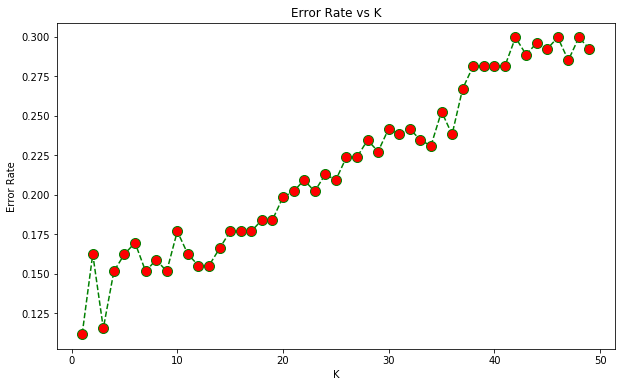

Optimal value of K is:  1
#############Evaluating the Performance of  KNN #############


Confusion Metrics:
[[ 59   6   2]
 [ 11 128   2]
 [  1   9  59]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.83      0.88      0.86        67
         car       0.90      0.91      0.90       141
         van       0.94      0.86      0.89        69

    accuracy                           0.89       277
   macro avg       0.89      0.88      0.88       277
weighted avg       0.89      0.89      0.89       277

Evaluating the Cross Validation score
Mean Accuracy: 84.71761743720594
Standard Deviation: 2.46305333920419
#############Evaluation Completed for  KNN  ###################


In [451]:
evaluate_knn_performance(X_train,y_train,X_test,y_test)

#### Optimal number of neigbours for prediction is 1.

### SVM

In [452]:
evaluate_svm_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  SVM #############


Confusion Metrics:
[[  0  67   0]
 [  0 141   0]
 [  0  68   1]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        67
         car       0.51      1.00      0.68       141
         van       1.00      0.01      0.03        69

    accuracy                           0.51       277
   macro avg       0.50      0.34      0.23       277
weighted avg       0.51      0.51      0.35       277

Evaluating the Cross Validation score
Mean Accuracy: 50.61482486516407
Standard Deviation: 0.21424109845295547
#############Evaluation Completed for  SVM  ###################


#### SVM model did not perform well with default values of hyper parameters

### SVM(with hyperparameter tuning)

In [453]:
model=do_hyperparams_tuning_svm(X_train,y_train,X_test,y_test)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.503, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=1, kernel=linear, score=0.937, total=   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.910, total=   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.884, total=   0.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.503, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.508, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.937, total=   0.4s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ...... C=0.05, gamma=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.948, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.926, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=linear ...............................
[CV] ... C=0.05, gamma=0.01, kernel=linear, score=0.894, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.503, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=rbf .................................
[CV] ..... C=0.05, gamma=0.002, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, gamma=0.002, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   10.2s finished


In [454]:
train_model("SVM (with hyperparam tuning)", model, X_train, X_test, y_train, y_test)

#############Evaluating the Performance of  SVM (with hyperparam tuning) #############


Confusion Metrics:
[[ 65   2   0]
 [  1 138   2]
 [  0   2  67]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.98      0.97      0.98        67
         car       0.97      0.98      0.98       141
         van       0.97      0.97      0.97        69

    accuracy                           0.97       277
   macro avg       0.98      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277

Evaluating the Cross Validation score
Mean Accuracy: 93.48687416887736
Standard Deviation: 3.255097285291252
#############Evaluation Completed for  SVM (with hyperparam tuning)  ###################


#### The model performed well with more than 97% of F1 score. But the model seems to be overfit because of high STD. This could be due to multicollenearity between the independent features

### AdaBoost

In [455]:
evaluate_adaboost_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  AdaBoost #############


Confusion Metrics:
[[ 64   3   0]
 [  5 133   3]
 [  3   8  58]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.89      0.96      0.92        67
         car       0.92      0.94      0.93       141
         van       0.95      0.84      0.89        69

    accuracy                           0.92       277
   macro avg       0.92      0.91      0.92       277
weighted avg       0.92      0.92      0.92       277

Evaluating the Cross Validation score
Mean Accuracy: 88.74376784593265
Standard Deviation: 3.176989483102589
#############Evaluation Completed for  AdaBoost  ###################


### Gradient Boost

In [456]:
evaluate_gradientboost_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  GradientBoost #############


Confusion Metrics:
[[ 66   1   0]
 [ 11 127   3]
 [  0  17  52]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.86      0.99      0.92        67
         car       0.88      0.90      0.89       141
         van       0.95      0.75      0.84        69

    accuracy                           0.88       277
   macro avg       0.89      0.88      0.88       277
weighted avg       0.89      0.88      0.88       277

Evaluating the Cross Validation score
Mean Accuracy: 88.06042809987649
Standard Deviation: 2.408679801041479
#############Evaluation Completed for  GradientBoost  ###################


### Meta Bagging

In [457]:
evaluate_metabagging_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  MetaBagging #############


Confusion Metrics:
[[ 63   4   0]
 [  4 134   3]
 [  0  14  55]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.94      0.94      0.94        67
         car       0.88      0.95      0.91       141
         van       0.95      0.80      0.87        69

    accuracy                           0.91       277
   macro avg       0.92      0.90      0.91       277
weighted avg       0.91      0.91      0.91       277

Evaluating the Cross Validation score
Mean Accuracy: 92.96826714728337
Standard Deviation: 1.6756584991343157
#############Evaluation Completed for  MetaBagging  ###################


### Random Forest

In [458]:
evaluate_randomforest_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  RandomForest #############


Confusion Metrics:
[[ 66   1   0]
 [  7 130   4]
 [  0   6  63]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.90      0.99      0.94        67
         car       0.95      0.92      0.94       141
         van       0.94      0.91      0.93        69

    accuracy                           0.94       277
   macro avg       0.93      0.94      0.93       277
weighted avg       0.94      0.94      0.93       277

Evaluating the Cross Validation score
Mean Accuracy: 91.75095684575038
Standard Deviation: 1.7579432328686508
#############Evaluation Completed for  RandomForest  ###################


### Random Forest with Hyperparameter tuning

In [459]:
model = do_hyperparms_tuning_rf(X_train,y_train,X_test,y_test)
train_model("RandomForest (With hyperparam tuning)", model, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.0s finished


#############Evaluating the Performance of  RandomForest (With hyperparam tuning) #############


Confusion Metrics:
[[ 65   2   0]
 [  3 134   4]
 [  0   6  63]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.96      0.97      0.96        67
         car       0.94      0.95      0.95       141
         van       0.94      0.91      0.93        69

    accuracy                           0.95       277
   macro avg       0.95      0.94      0.95       277
weighted avg       0.95      0.95      0.95       277

Evaluating the Cross Validation score
Mean Accuracy: 94.90743403333266
Standard Deviation: 0.8340060369975792
#############Evaluation Completed for  RandomForest (With hyperparam tuning)  ###################


#### Random Forest performed very well with default data. Class level F1 score is ~95%. More over the standard deviation is very low.

## PCA - Handle Multicollinearity and reduce dimensions

EigenValues Size:  18
EigenVectors: 
 [9.31194014e+00 2.94518245e+00 2.03164241e+00 1.22913422e+00
 8.93951217e-01 5.44417153e-01 3.60306132e-01 2.15580911e-01
 1.61060761e-01 9.20058315e-02 6.97560643e-02 4.95976177e-02
 4.27366497e-03 3.84993952e-02 3.02852414e-02 1.24695933e-02
 1.88467221e-02 2.27406141e-02]
Cumulative Variance: 
 [0.51642082 0.6797545  0.79242516 0.86059039 0.91016706 0.9403593
 0.96034113 0.9722968  0.9812289  0.98633135 0.99019987 0.99295045
 0.99508555 0.99676511 0.99802625 0.99907145 0.99976299 1.        ]


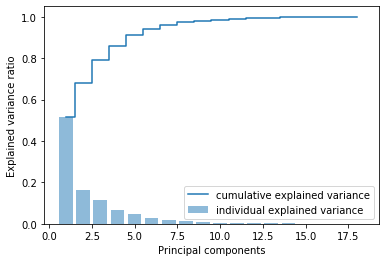

In [460]:
sc= StandardScaler()
df_scaled = sc.fit_transform(X_train)
do_pca(df_scaled)

#### 98% of the variance is captured by first 8 principle components. So I am taking the number of features as 8

In [461]:
P_reduce = np.array(eigvectors_sorted[0:8])

X_train_reduced = np.dot(df_scaled,P_reduce.T)

X_train_reduced = pd.DataFrame(X_train_reduced)

X_train_reduced.head()



0         1         2         3         4         5         6  \
0 -2.701229 -2.429580  0.395751  2.474926 -0.287336 -1.193117  0.367244   
1 -1.299871 -0.498110  0.084751 -0.898506  0.781839 -0.156370 -0.676676   
2 -1.151195  0.489605  0.072094 -0.434615  1.870368 -0.189538 -0.842309   
3 -0.115180 -1.465622 -0.006911  1.847464 -0.169227  0.430726  0.056073   
4  1.608654  2.258136 -0.116194  0.653674  0.575588 -0.713358 -0.924859   

          7  
0 -0.481252  
1 -0.429176  
2 -0.237009  
3 -0.704427  
4  0.120652

In [463]:
X_train_reduced.shape

(569, 8)

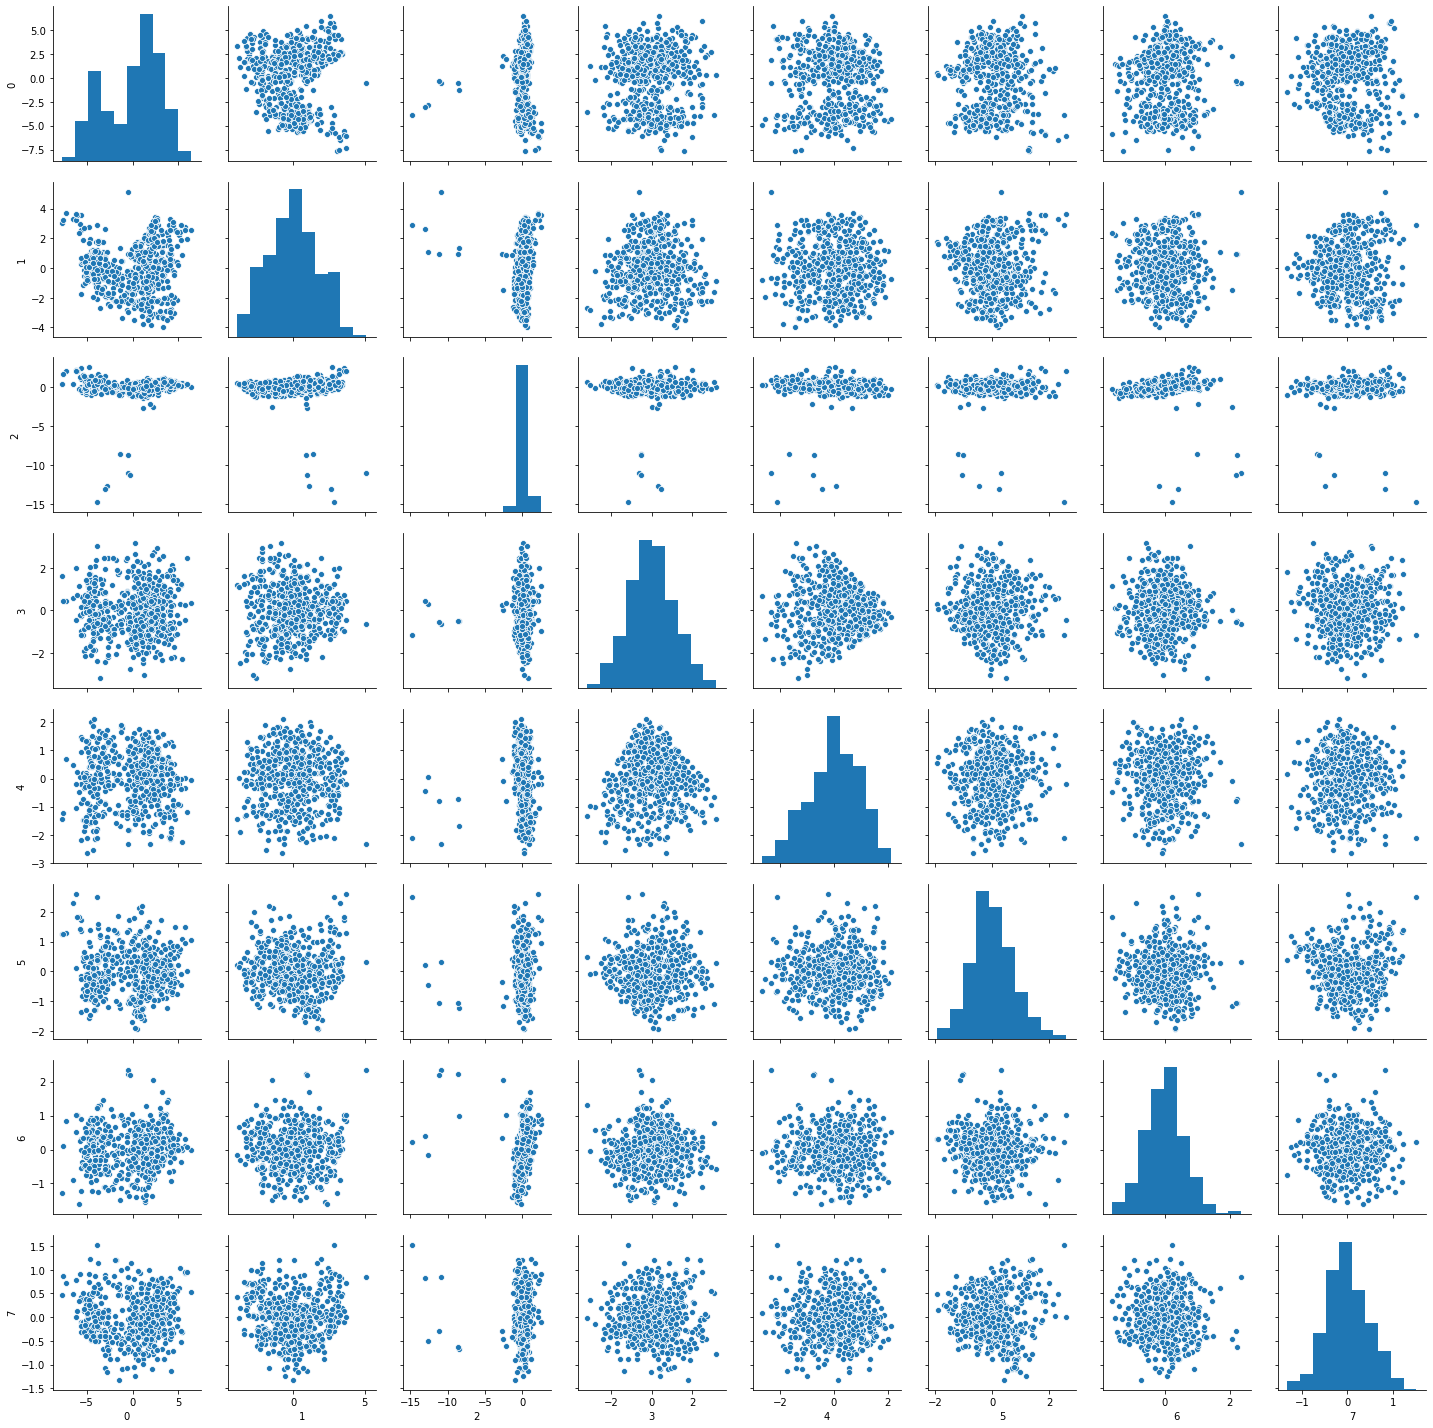

In [464]:
sns.pairplot(X_train_reduced)

#### From the above pairplot, it's clear that the multicollinearity between the features are completely vanished after transforming the features into principal components.

In [465]:

sc= StandardScaler()
df_scaled_test = sc.fit_transform(X_test)

X_test_reduced =  np.dot(df_scaled_test,P_reduce.T)

X_test_reduced = pd.DataFrame(X_test_reduced)

X_test_reduced.head()

0         1         2         3         4         5         6  \
0 -3.844970  0.608627  0.495783  0.704635  0.978468 -0.964796  0.833445   
1  2.061356  1.239165 -0.220914 -0.420542  1.551740 -0.288748 -0.303786   
2  3.973982  1.422599  1.221499 -0.391677 -0.273131  0.003502  0.219707   
3  1.769044 -0.955273  0.612107  0.877839  1.057691  0.641786  0.554430   
4  0.889084  0.352191 -0.839591 -0.319872  0.363544 -0.777984  0.158796   

          7  
0  0.069214  
1 -0.303361  
2 -0.294719  
3 -0.673129  
4 -0.631530

In [466]:
X_test_reduced.shape

(277, 8)

## Re-train the classification models using transformed features:

### Logistic Regression

In [467]:
evaluate_logisticregression_performance(X_train_reduced,y_train,X_test_reduced,y_test)

#############Evaluating the Performance of  Logistic Regression #############


Confusion Metrics:
[[ 59   5   3]
 [ 14 123   4]
 [  7  12  50]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.74      0.88      0.80        67
         car       0.88      0.87      0.88       141
         van       0.88      0.72      0.79        69

    accuracy                           0.84       277
   macro avg       0.83      0.83      0.82       277
weighted avg       0.84      0.84      0.84       277

Evaluating the Cross Validation score
Mean Accuracy: 85.05321209912043
Standard Deviation: 2.19638647607507
#############Evaluation Completed for  Logistic Regression  ###################


### Naive Bayes

In [468]:
evaluate_naivebayes_performance(X_train_reduced,y_train,X_test_reduced,y_test)

#############Evaluating the Performance of  Naive Bayes #############


Confusion Metrics:
[[ 58   7   2]
 [ 12 127   2]
 [  9  25  35]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.73      0.87      0.79        67
         car       0.80      0.90      0.85       141
         van       0.90      0.51      0.65        69

    accuracy                           0.79       277
   macro avg       0.81      0.76      0.76       277
weighted avg       0.81      0.79      0.78       277

Evaluating the Cross Validation score
Mean Accuracy: 78.72170807935575
Standard Deviation: 2.8846928183839524
#############Evaluation Completed for  Naive Bayes  ###################


### KNN

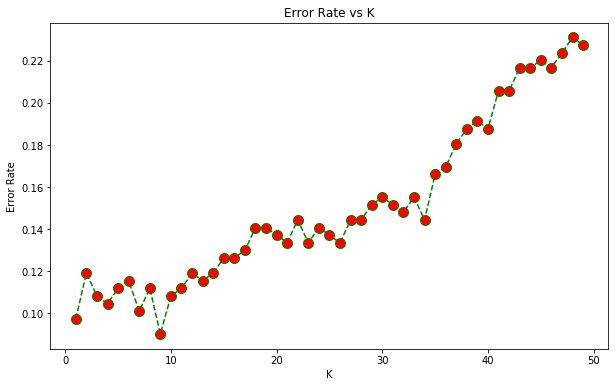

Optimal value of K is:  9
#############Evaluating the Performance of  KNN #############


Confusion Metrics:
[[ 66   0   1]
 [  3 129   9]
 [  5   5  59]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.89      0.99      0.94        67
         car       0.96      0.91      0.94       141
         van       0.86      0.86      0.86        69

    accuracy                           0.92       277
   macro avg       0.90      0.92      0.91       277
weighted avg       0.92      0.92      0.92       277

Evaluating the Cross Validation score
Mean Accuracy: 88.2312630363905
Standard Deviation: 2.902705807213534
#############Evaluation Completed for  KNN  ###################


In [469]:
evaluate_knn_performance(X_train_reduced,y_train,X_test_reduced,y_test)

### SVM

In [470]:
evaluate_svm_performance(X_train_reduced,y_train,X_test_reduced,y_test)

#############Evaluating the Performance of  SVM #############


Confusion Metrics:
[[ 66   1   0]
 [  1 135   5]
 [  1   8  60]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.97      0.99      0.98        67
         car       0.94      0.96      0.95       141
         van       0.92      0.87      0.90        69

    accuracy                           0.94       277
   macro avg       0.94      0.94      0.94       277
weighted avg       0.94      0.94      0.94       277

Evaluating the Cross Validation score
Mean Accuracy: 93.6716280890761
Standard Deviation: 1.806464819662396
#############Evaluation Completed for  SVM  ###################


### SVM (with Hyperparameter tuning)

In [471]:
model=do_hyperparams_tuning_svm(X_train_reduced,y_train,X_test_reduced,y_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.759, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.794, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.815, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.880, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.862, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.910, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.880, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.862, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.910, total=   0.0s
[CV] C=1, gamma=0.002, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.002, kernel=rbf, score=0.513, total=   0.0s
[CV] C=1, gamma=0.002, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.002, kernel=rbf, score=0.513, total=   0.0s
[CV] C=1, gamma=0.002, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.002, kernel=rbf, score=0.513, total=   0.0s
[CV] C=1, gamma=0.002, kernel=linear .................................
[CV] ..... C=1, gamma=0.002, kernel=linear, score=0.880, total=   0.0s
[CV] 

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.926, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.880, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.862, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.910, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.869, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.884, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.868, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    1.1s finished


In [472]:
train_model("SVM (with hyperparam tuning)", model, X_train_reduced, X_test_reduced, y_train, y_test)

#############Evaluating the Performance of  SVM (with hyperparam tuning) #############


Confusion Metrics:
[[ 66   1   0]
 [  1 135   5]
 [  1   7  61]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.97      0.99      0.98        67
         car       0.94      0.96      0.95       141
         van       0.92      0.88      0.90        69

    accuracy                           0.95       277
   macro avg       0.95      0.94      0.94       277
weighted avg       0.95      0.95      0.95       277

Evaluating the Cross Validation score
Mean Accuracy: 93.6716280890761
Standard Deviation: 1.3026978843654844
#############Evaluation Completed for  SVM (with hyperparam tuning)  ###################


### Gradient Boost

In [473]:
evaluate_gradientboost_performance(X_train_reduced,y_train,X_test_reduced,y_test)

#############Evaluating the Performance of  GradientBoost #############


Confusion Metrics:
[[ 59   8   0]
 [  3 129   9]
 [  0  19  50]]


Model Performance Summary:
              precision    recall  f1-score   support

         bus       0.95      0.88      0.91        67
         car       0.83      0.91      0.87       141
         van       0.85      0.72      0.78        69

    accuracy                           0.86       277
   macro avg       0.88      0.84      0.85       277
weighted avg       0.86      0.86      0.86       277

Evaluating the Cross Validation score
Mean Accuracy: 82.244398992865
Standard Deviation: 3.246468286954278
#############Evaluation Completed for  GradientBoost  ###################


## Feature Selection

#### NOT IMPLEMENT EDEXCEPTION() :)

## Clustering

In [521]:
vehicles_df["class"] = vehicles_df.apply(lambda r: 0 if r["class"] == "van" else 1 if r["class"] == "car" else 2,axis=1)

In [522]:
vehicles_df = vehicles_df.fillna(X.median())

In [523]:
vehicles_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      0  
1             189.0            199      0  
2             188.0            196      1  
3             199.0            207      0  
4             180.0            183      2

In [270]:
def evaluate_kmeans_clustering(data):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, max_iter=300) 
    
    y_pred = kmeans.fit_predict(data.drop("class",axis=1))
    
    print(y_pred)
    #data['Cluster'] = data.apply((lambda r: 0 if r["class"] == "van" else 1 if r["class"] == "car" else 2),axis=1)
    print(metrics.confusion_matrix(data['class'],y_pred))
    print(metrics.classification_report(data['class'],y_pred))

In [271]:
evaluate_kmeans_clustering(vehicles_df)

[0 0 1 0 0 1 0 0 0 2 0 0 0 0 2 1 0 2 1 1 0 0 0 0 1 0 0 1 2 0 0 0 0 1 2 0 0
 2 1 0 1 0 0 2 1 0 0 0 0 2 0 0 1 0 1 0 2 0 1 0 2 0 0 0 2 0 0 1 0 2 1 1 2 0
 0 2 2 0 1 0 0 1 0 0 0 1 0 0 2 0 1 2 2 0 0 1 0 0 1 0 0 0 0 0 2 1 2 0 0 2 0
 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 0 0 0 1 2 0 2 0 1 2 0 0 0 0 0 0 1 0 2 1 0 0
 0 0 2 2 0 1 0 1 0 0 0 0 0 1 2 0 1 1 0 1 0 0 1 1 0 1 0 0 2 0 0 0 1 0 0 0 1
 2 2 0 1 0 2 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 2 0 0 1 2 0 0 1 0 0 0 1 0 0 1 0
 2 0 0 0 1 0 1 0 0 0 0 1 0 0 2 0 1 0 0 0 0 1 0 0 0 2 1 0 0 1 0 0 0 1 0 0 1
 1 0 2 0 0 2 0 0 2 0 0 0 2 0 0 1 0 0 0 1 0 2 0 0 1 0 2 0 0 1 0 0 0 0 0 1 0
 2 0 2 2 1 0 0 0 0 0 1 1 0 1 2 0 0 1 0 0 0 2 0 1 1 1 0 2 2 0 2 0 0 0 0 2 1
 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 2 0 0 0 2 2 0 1 0 2 1 2 2 0 0 1 0 0 0 0
 2 2 0 2 0 1 1 0 0 1 0 1 0 1 0 0 2 0 2 1 0 0 0 0 2 0 1 0 2 0 1 0 1 0 2 0 0
 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 1 2 1 0 1 1 0 0 1 0 0 0 2 2 2 0 0 2
 1 0 2 1 1 0 0 0 0 0 1 0 0 0 1 2 0 1 2 0 2 0 0 1 1 0 0 1 1 1 0 1 1 0 2 0 1
 1 2 0 0 0 1 0 0 1 1 0 0 

### Use Pricipal Components for Clustering

EigenValues Size:  18
EigenVectors: 
 [9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02]
Cumulative Variance: 
 [0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549 0.97335049 0.98226265 0.98735979 0.99104984 0.9936357
 0.99562195 0.99714304 0.99828498 0.99927917 0.9998355  1.        ]


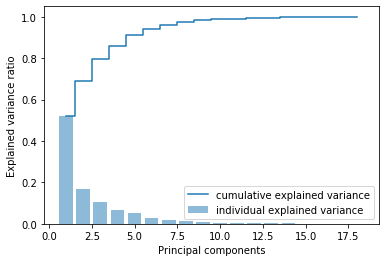

In [540]:
sc= StandardScaler()
df_scaled = sc.fit_transform(vehicles_df.drop("class",axis=1))
do_pca(df_scaled)

P_reduce = np.array(eigvectors_sorted[0:8])

X_reduced = np.dot(df_scaled,P_reduce.T)

X_reduced = pd.DataFrame(X_reduced)

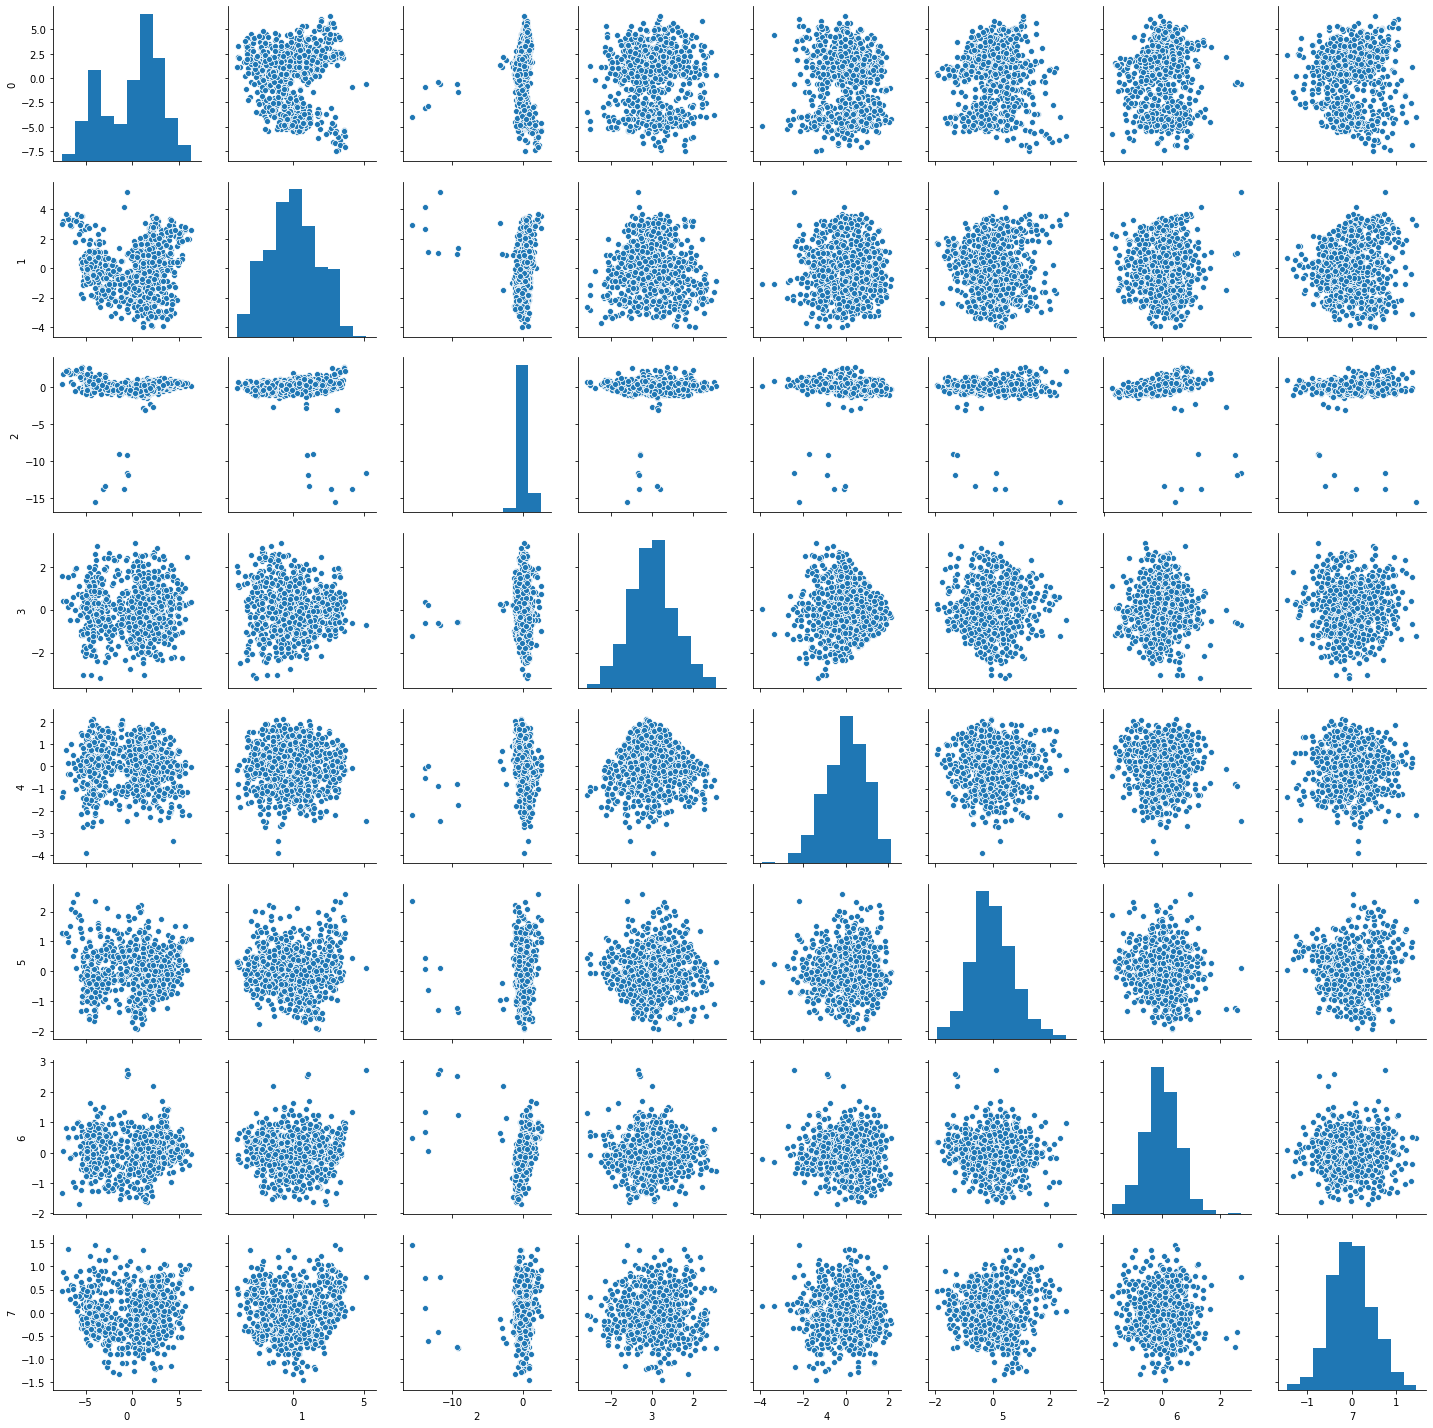

In [541]:
sns.pairplot(X_reduced)

In [538]:
df=pd.concat([X_reduced,y],axis=1)
df.head()


0         1          2         3         4         5         6  \
0 -0.330159 -0.181297  -0.991016 -0.197302 -0.002140 -0.935490 -0.750487   
1  1.597243 -0.411361   0.324684 -0.211915 -0.699526 -0.451293  0.482334   
2 -3.772970  0.122008  -0.094963 -1.195247 -0.753661  0.671755 -0.103637   
3  1.780871 -2.816903  -0.171645 -0.309018  0.360323 -0.407191  0.523942   
4 -0.599075  5.178802 -11.681321 -0.708037 -2.437771  0.108683  2.734895   

          7         8         9        10        11        12        13  \
0  0.142197  0.906379 -0.148111  0.041147  0.005882 -0.072502 -0.294725   
1 -0.186731 -0.212083  0.176970  0.468467 -0.257140 -0.082386 -0.107967   
2 -0.571169  0.268463  0.442943  0.197839 -0.130310 -0.072384 -0.105567   
3  0.016269 -0.026325 -0.402622  0.390789 -0.007219  0.237547 -0.164874   
4  0.758960 -1.879715  0.457713 -0.195391 -0.008351 -0.291779 -0.396184   

         14        15        16        17 class  
0  0.098134  0.230390  0.019229  0.021873   van  
1  0.029210  0.026317 -0.021628 -0.009257   van  
2  0.001077 -0.060370 -0.153294  0.040503   car  
3 -0.163880  0.078307  0.091894  0.008664   van  
4 -0.781578  0.179348  0.051439  0.032248   bus

In [539]:
df['class'] = df.apply((lambda r: 0 if r["class"] == "van" else 1 if r["class"] == "car" else 2),axis=1)
evaluate_kmeans_clustering(df)

[1 1 2 1 0 2 1 1 1 1 1 1 1 1 1 2 0 1 2 2 0 0 1 1 2 1 0 2 2 0 1 1 1 2 1 1 0
 2 2 0 2 0 0 1 2 0 0 0 0 1 0 1 2 1 2 1 1 0 2 0 2 0 0 0 1 0 0 2 1 2 2 2 1 0
 1 2 1 0 2 0 0 2 1 0 1 2 1 0 1 0 2 1 2 1 0 2 0 0 2 0 0 1 1 0 2 2 2 0 0 2 1
 1 0 0 0 1 2 2 0 1 0 0 1 0 0 0 0 0 1 2 2 1 1 0 2 2 0 1 0 1 1 0 2 0 1 2 1 1
 1 1 2 1 1 2 1 2 1 0 1 1 0 2 1 1 2 2 1 2 0 0 2 2 1 2 1 1 1 1 1 0 2 0 1 0 2
 1 1 1 2 1 2 1 1 2 1 0 2 0 0 0 1 1 2 2 1 1 1 0 0 2 1 1 1 2 0 1 0 2 0 1 2 0
 2 0 0 1 2 1 2 0 0 0 0 2 1 0 1 0 2 0 1 1 0 2 0 0 1 1 2 0 0 2 0 1 1 2 1 1 2
 2 0 1 1 1 2 0 0 1 1 0 0 1 1 1 2 1 0 0 2 1 1 0 0 2 0 1 1 0 2 0 1 2 1 1 2 1
 2 0 1 1 2 1 1 1 0 1 2 2 2 2 2 0 1 2 0 0 0 1 0 2 2 2 0 2 1 0 2 1 1 1 1 2 2
 0 2 2 0 2 1 1 1 0 0 2 2 2 2 1 1 1 2 0 1 0 2 1 1 2 1 2 2 2 1 0 0 2 0 0 0 1
 1 1 1 1 0 2 2 0 0 2 0 2 0 2 1 0 1 0 2 2 0 1 1 1 2 1 2 1 1 1 2 1 2 1 2 1 0
 0 1 1 1 0 0 1 0 2 1 1 0 1 0 2 1 0 1 1 2 1 2 1 2 2 0 0 2 1 0 0 1 2 2 0 1 2
 2 0 2 2 2 1 1 1 1 1 2 0 0 1 2 1 1 2 1 0 2 0 0 2 2 1 0 2 2 2 0 2 2 0 1 0 2
 2 1 1 0 0 2 1 0 2 2 1 0 

## Ensemble Classification and Clustering results

#### NOT IMPLEMENTED EXCEPTION() 

## Summary

### Non Technical Summary

1. Cars have higher circularity, primary axis rectangualrity and Compactness
2. Vans have low scatter ratio and scaled variance, but high elongateness
3. Hollows ratio for "bus" is having lower values compared to"van" and "car"
4. max_length_aspect ratio is an important feature for identifying bus from other two classes.

### Technical Summary

SVM performed very well with this dataset. 

The following activities are done to make the model performance better:
    1. Tuned hyperparameters (C = 0.1, kernel= rbf)
    2. Model is trained and tested over Principal Components(top 8) 
    3. Model property:
        F1 Score : 
         bus       0.98 
         car       0.95 
         van       0.90 
         
        Standard Deviation: 1.3
        
The model predicts the class with 98% precision 